In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("winequality-red.csv", delimiter=';')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [7]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [8]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [9]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
 df_test.quality, test_predictions
)

In [10]:
train_accuracy

0.775

In [11]:
test_accuracy

0.5826377295492488

In [12]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [13]:
accuracy(df_train.quality, train_predictions)

0.775

In [14]:
accuracy(df_test.quality, test_predictions)

0.5826377295492488

In [15]:
from sklearn import metrics

In [16]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

In [17]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
             tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [18]:
true_positive(l1, l2), true_negative(l1, l2), false_positive(l1, l2), false_negative(l1, l2)

(2, 3, 1, 2)

In [19]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [20]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [21]:
accuracy(l1, l2), accuracy_v2(l1, l2), metrics.accuracy_score(l1, l2)

(0.625, 0.625, 0.625)

In [22]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [23]:
precision(l1, l2)

0.6666666666666666

In [24]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall


In [25]:
recall(l1, l2)

0.5

In [26]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [
    0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,
    0.15952202, 0.03819563, 0.11639273, 0.079377, 0.08584789, 0.39095342,
    0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905,
    0.61977213, 0.33056815]

In [27]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]

p = precision(y_true, temp_prediction)
r = recall(y_true, temp_prediction)
precisions.append(p)
recalls.append(r)

In [28]:
temp_prediction

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [29]:
recalls, precisions

([0.3333333333333333], [1.0])

Text(0, 0.5, 'Precision')

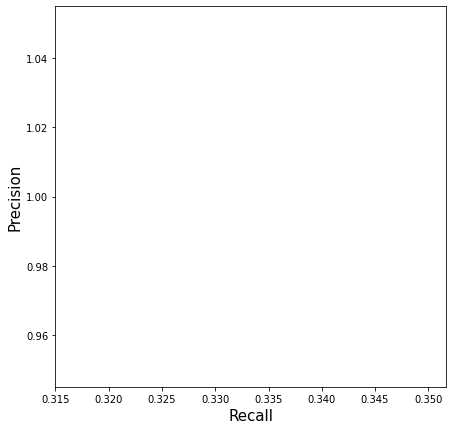

In [30]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [31]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [32]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [33]:
f1(y_true, y_pred)

0.5714285714285715

In [34]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [35]:
# true positive rate and false positive rate

def tpr(y_true, y_pred):
 """
 Function to calculate tpr
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: tpr/recall
 """
 return recall(y_true, y_pred)

def fpr(y_true, y_pred):
 """
 Function to calculate fpr
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: fpr
 """
 fp = false_positive(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 return fp / (tn + fp)

In [36]:
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [37]:
tpr_list

[1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]

In [38]:
fpr_list

[1.0, 0.9, 0.7, 0.6, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]

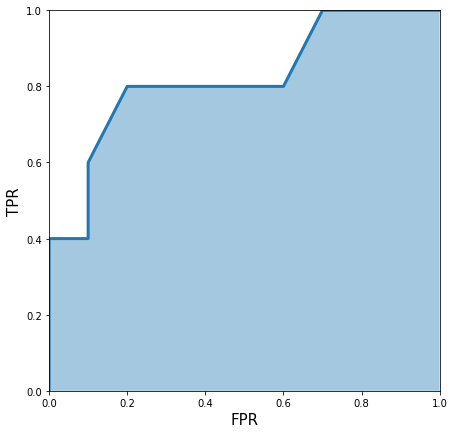

In [39]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [40]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1,
 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
 0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [41]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [45]:
tp_list

[5, 5, 5, 4, 4, 4, 4, 3, 3, 2, 2, 1, 0]

In [46]:
fp_list

[10, 9, 7, 6, 3, 3, 2, 1, 1, 1, 0, 0, 0]

In [54]:
def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
            yt * np.log(yp)
            + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
        # return mean loss over all samples
        return np.mean(loss)

In [55]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.10536051565782628

In [56]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294

Text(0.5, 48.5, 'Predicted Labels')

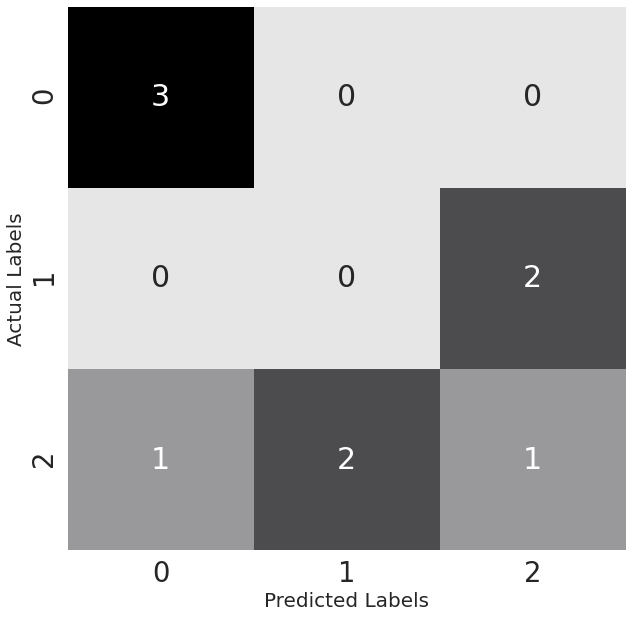

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)